# 2D nearest neighbor chain

Optimatrix on 2D grid optimises matrix with elements $1/r_{ij}$.

Notice, results can not be different compare to the interaction matrix $\sim 1/r_{ij}^6$


In [32]:
import pulser
import numpy as np
import example.helpers as helpers

import optimatrix

In [33]:
def two_dim_lattice(M: int, N: int) -> np.ndarray:
    coords = np.array(
        [
            (i, j) for j in range(M) for i in range(N) 
        ]
    )


    def rotate(theta, vector):
        rotation = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),  np.cos(theta)]
        ])
        return rotation @ vector
    
    
    rotated_coords = np.array([rotate(0, coord) for coord in coords])

    return pulser.Register.from_coordinates(rotated_coords, center = True)


chain = two_dim_lattice(3, 2)

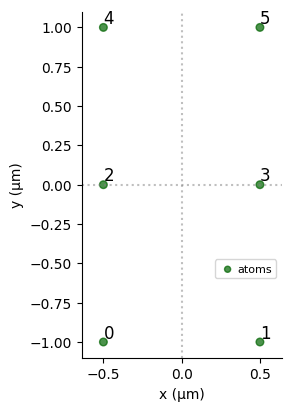

In [34]:
chain.draw()

optimal permutation is
 [0, 1, 2, 3, 4, 5]


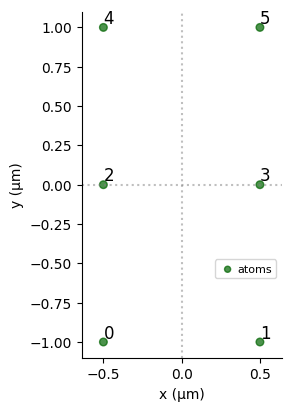

In [35]:
interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

optimal permutation is
 [3, 1, 2, 5, 4, 0]


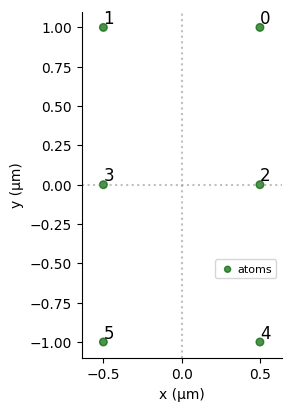

In [36]:
# Second optimisation with shuffling

chain = helpers.shuffle_qubits(chain)


interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

In [37]:
print(interactions)

[[0.   0.25 0.5  0.2  1.   1.  ]
 [0.25 0.   0.5  1.   0.2  1.  ]
 [0.5  0.5  0.   1.   1.   1.  ]
 [0.2  1.   1.   0.   0.25 0.5 ]
 [1.   0.2  1.   0.25 0.   0.5 ]
 [1.   1.   1.   0.5  0.5  0.  ]]
